In [1]:
import pandas as pd

# 붓꽃 데이터 CSV 파일 읽기
file_path = "C:\\workplace\\AI\\AI_2025-1\\week1\\iris.csv"  # 본인이 iris.csv를 저장한 경로를 입력합니다.
df = pd.read_csv(file_path)

# 데이터프레임 확인
print(df.head)
print(df.columns)

<bound method NDFrame.head of      SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]>
Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')


In [3]:
!pip install scikit-learn pandas matplotlib

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [7]:
# 데이터 분할
x = df.drop(columns=['Name'])  # 'Name' 열을 제외한 피처들
y = df['Name']  # 'Name' 열을 타겟으로

# 학습 데이터와 테스트 데이터로 분리 (80% 학습, 20% 테스트)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
# K-NN 모델 초기화
k = 3  # k 값은 사용자에 맞게 설정할 수 있습니다.
knn = KNeighborsClassifier(n_neighbors=k)

# 모델 훈련
knn.fit(x_train, y_train)

# 예측
y_pred = knn.predict(x_test)

print(y_pred[0:10])

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor']


In [25]:
# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy :.4f}")

Accuracy: 1.0000


In [33]:
print(y_test[0:10])

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
Name: Name, dtype: object


# K 값 튜닝

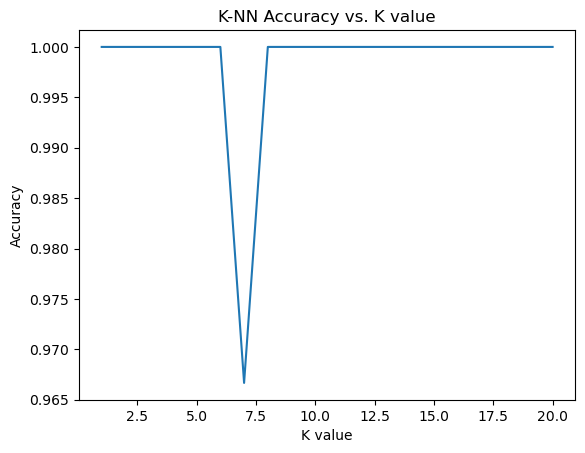

In [43]:
# 여러 K 값에 대해 정확도 확인
k_values = range(1, 21)  # 1부터 20까지의 K 값
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# 정확도를 그래프으로 시각화
plt.plot(k_values, accuracies)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K-NN Accuracy vs. K value')
plt.show()